# Responsi Praktikum Bigdata & Data Mining
 
 Rule:


1.   Kerjakan Secara individu, plagiarism==0
2.   Rename nama File IPYNB dengan menambahkan 4 Digit nim terakhir anda
3. Tulis identitas anda(Nim, Nama & kelas) pada file IPynb anda
4. Setelah selesai, letakkan file anda pada desktop
5. File akan di collect secara otomatis ketika waktu pengerjaan telah berakhir
6. durasi pengerjaan 60 Menit
7. Gunakan Dataset: https://drive.google.com/file/d/1nV2npfd_UWaEPV7iFDtn6x2LvFjLzbKb/view?usp=sharing




# Identitas


*   Nim: 20.11.3694
*   Nama: Fathurrahman Nur Aziz
*   Kelas: 20IF07




In [ ]:
#IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Tampilkan dataset dalam bentuk dataframe.
Link dataset:

In [ ]:
url = 'https://drive.google.com/file/d/1nV2npfd_UWaEPV7iFDtn6x2LvFjLzbKb/view?usp=sharing' #link google drive dataset
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


2. Adakah Data Kosong? Jika ada maka lakukan penanganan terhadap data kosong tersebut Penjelasan !

In [ ]:
#cek total baris dan kolom
df.shape

(306429, 8)

In [ ]:
#cek apakah null
df.isna().any()

SNo                False
ObservationDate    False
Province/State      True
Country/Region     False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

In [ ]:
#cek jumlah null
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [ ]:
#lakukan drop row yang null pada kolom province/state
df.dropna(subset=['Province/State'],inplace=True)

In [ ]:
#cek null setelah drop
df.isna().any()

SNo                False
ObservationDate    False
Province/State     False
Country/Region     False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

In [ ]:
#cek jumlah null stelah drop
df.isna().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [ ]:
#drop kolom yang tidak diperlukan
df.drop(columns=['SNo','ObservationDate','Province/State','Country/Region','Last Update'],inplace=True)
df

,Confirmed,Deaths,Recovered
0,1.0,0.0,0.0
1,14.0,0.0,0.0
2,6.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
306424,102641.0,2335.0,95289.0
306425,29147.0,245.0,0.0
306426,1364.0,1.0,1324.0
306427,87550.0,1738.0,83790.0


3. Adakah Outlier dari dataset Anda, Beri Penjelasan?

In [ ]:
#cek deskriptif statistik
df.describe()

,Confirmed,Deaths,Recovered
count,2.283290e+05,228329.000000,2.283290e+05
mean,8.021276e+04,1961.347503,4.184290e+04
std,2.493646e+05,5871.902776,1.793659e+05
min,-3.028440e+05,-178.000000,-8.544050e+05
25%,1.224000e+03,15.000000,0.000000e+00
50%,1.175600e+04,234.000000,1.211000e+03
75%,4.840900e+04,1411.000000,1.660200e+04
max,5.713215e+06,112385.000000,6.399531e+06


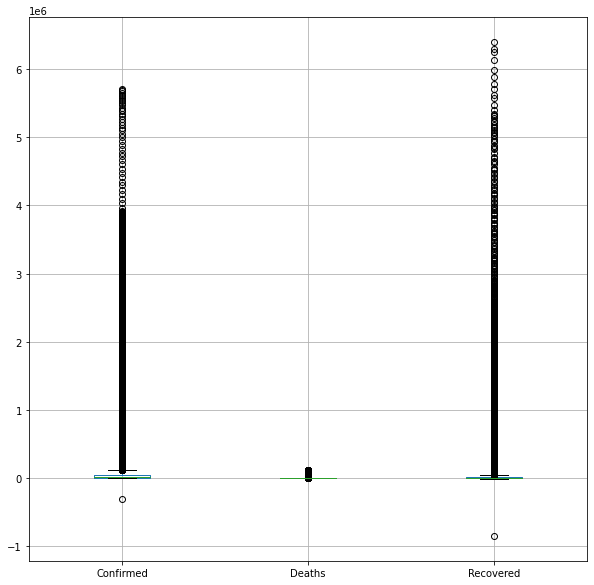

In [ ]:
#cek outlier dengan boxplot
plt.figure(figsize=(10,10))
df.boxplot()
plt.show()

dari boxplot di atas, ditemukan outlier pada kolom "Confirmed", "Deaths", dan "Recovered"

**Outlier tidak dapat diproses karena data sangat tersebar, sehingga tidak memungkinan untuk menghilangkan outlier.**

4. Dengan Menggunakan Konsep Regresi, dataset tersebut bisa digunakan untuk apa?

**MENARIK KESIMPULAN ADAKAH HUBUNGAN ANTAR 3 KOLOM CONFIRMED, DEATHS, DAN RECOVERED**

5. Lakukan Feature selection untuk mendukung mendukung proses mining soal nomor 4. Lakukan Setidaknya dengan 3 Metode. Kemudian Pilih yang 1 hasil yang terbaik menurut Anda, jelaskan kenapa anda memilih hasil tersebut. Gunakan Hasil Pilihan Anda untuk mengerjakan Soal Nomor 6

FILTER DENGAN PEARSON CORR

In [ ]:
#Correlation with output variable
import seaborn as sns 
import matplotlib.pyplot as plt

cor = df.corr()
cor_target = abs(cor['Confirmed'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features

Confirmed    1.000000
Deaths       0.881104
Name: Confirmed, dtype: float64

In [ ]:
#Menampilkan korelasi antara Confirmed dan Death
print(df[["Confirmed","Deaths"]].corr())

#Menampilkan korelasi antara Confirmed dan Death
print("\n",df[["Confirmed","Recovered"]].corr())

           Confirmed    Deaths
Confirmed   1.000000  0.881104
Deaths      0.881104  1.000000

            Confirmed  Recovered
Confirmed   1.000000   0.498839
Recovered   0.498839   1.000000


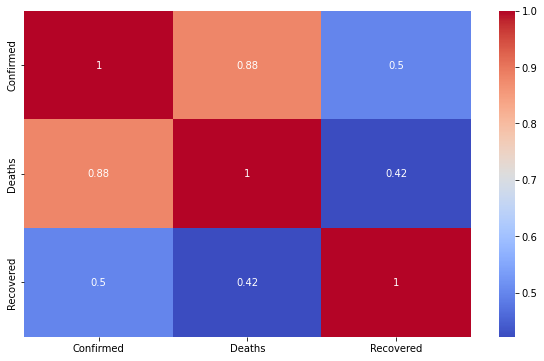

In [ ]:
#CEK HEATMAP
import seaborn as sns

cor=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,cmap='coolwarm',annot=True)
plt.show()

FORWARD SELECTION

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = df.drop("Confirmed",1)   #Feature Matrix
y = df["Confirmed"]  

In [ ]:
import statsmodels.api as sm

In [ ]:
def forward_selection(data, target, significance_level=0.05): #Choose a significance level (e.g. SL = 0.05 with a 95% confidence).
    initial_features = data.columns.tolist() #convert kolom ke dalam bentuk list
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

['Deaths', 'Recovered']


Random Forest Importance


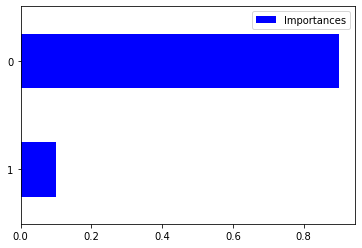

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)

model.fit(X,y)

importances = model.feature_importances_

result_df = pd.DataFrame({'Features':pd.DataFrame(X).columns,'Importances':importances})
result_df.set_index('Importances')

result_df = result_df.sort_values('Importances')
result_df.plot.barh(color = 'blue')

In [ ]:
result_df

,Features,Importances
1,Recovered,0.098976
0,Deaths,0.901024


dari 3 pilihan diatas saya memilih metode RANDOM FOREST IMPORTANCE karena memberikan data "importances" yang lebih jelas jika dibandingkan dengan kolom Confirmed.

6. Buatlah Model dari proses mining yang anda lakukan sesuai dengan jawaban nomor 4

Model dari proses mining berdasarkan nomor 4 dan 5 adalah:

Terdapat korelasi antara kolom Confirmed dan Death yaitu Kolom Confirmed **berbanding lurus** dengan kolom Death.

ARTINYA : Semakin banyak kasus terkonfirmasi maka semakin banyak pula kasus tewas nya dan sebaliknya, semakin sedikit kasus terkonfirmasi maka semakin sedikit pula kasus tewas nya